# Project : Case Study (Part - II)

Name : Aniruddha Shende

1.Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore


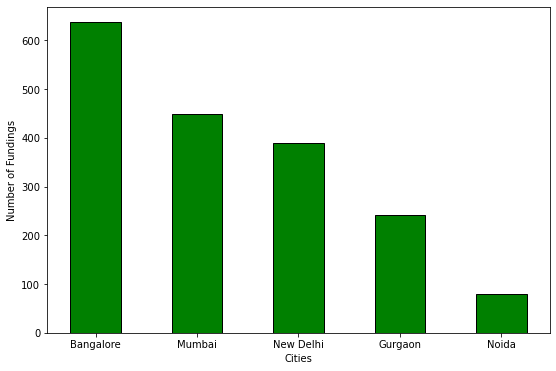

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("/Users/ani/Downloads/startup_funding.csv")  #reading data from startup_funding.csv file
df = startup.copy()  # just making a copy of startup dataframe for reference

df.dropna(subset = ["CityLocation"],inplace = True)  #dropped the row's having nan's in city location column
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)  #replaced the wrong word with the correct one
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)

d1 = {}   # created a dictionary to maintain the number of fundings in the provided locations

for i in df["CityLocation"]: # traverse through all the locations and maintaining the number of times the provided locations fetched
    if "Bangalore" in i:
        d1["Bangalore"] = d1.get("Bangalore",0) + 1  
    elif "Mumbai" in i:
        d1["Mumbai"] = d1.get("Mumbai",0) + 1
    elif "New Delhi" in i:
        d1["New Delhi"] = d1.get("New Delhi",0) + 1
    elif "Noida" in i:
        d1["Noida"] = d1.get("Noida",0) + 1
    elif "Gurgaon" in i:
        d1["Gurgaon"] = d1.get("Gurgaon",0) + 1
        
cities = sorted(d1, key=d1.get , reverse=True)   #sorting the keys in descending order
fundings = []  

for i in cities:  #traversing through the cities...and created a new list of values...in sorted format 
    fundings.append(d1[i])
    
print(cities[0]) #printing the location having most number of fundings
fig = plt.figure(figsize =(9, 6))
plt.bar(cities,fundings,width = 0.5,color = "green" , edgecolor = "black")  # plot the bar graph - cities vs no of fundings
plt.xlabel("Cities")   #labeling x-axis
plt.ylabel("Number of Fundings")  #labeling y_axis
plt.xticks(rotation = 0) 
plt.show()

2.Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital         64
Accel Partners          53
Kalaari Capital         44
SAIF Partners           41
Indian Angel Network    40
dtype: int64


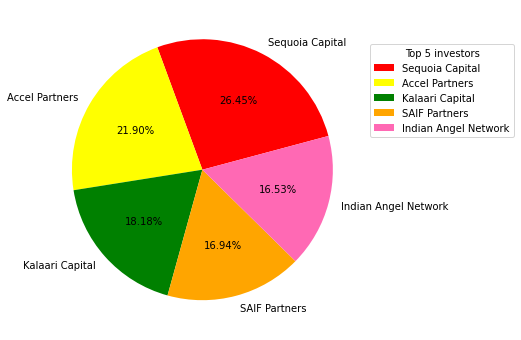

In [45]:
import pandas as pd
import matplotlib.pyplot as plt 

startup = pd.read_csv("/Users/ani/Downloads/startup_funding.csv") #reading data from startup_funding.csv file
df = startup.copy() # just making a copy of startup dataframe for reference

df.dropna(subset = ["InvestorsName"],inplace = True)  #removing row's having nan's in Investors name column

list_with_trailing_spaces=[] # creating a list to store the investors name
for t in df.InvestorsName:
    list_with_trailing_spaces.extend(t.split(',')) # as there are multiple investors we need to separate them out

list_without_trailing_spaces=[] #creating a list which will remove the unnecessary spaces
for i in list_with_trailing_spaces:
    list_without_trailing_spaces.append(i.strip())# removing trailing spaces

invest=pd.Series(list_without_trailing_spaces)

top_5_investors=invest.value_counts()[:5]  #extracting the top 5 investors
print(top_5_investors)

fig = plt.figure(figsize =(10, 6))  
colors = ( "red", "yellow", "green","orange", "hotpink")
legends_list = []  #making a list to store the names of top 5 investors 
plt.pie(top_5_investors.values,labels=top_5_investors.index, autopct='%.2f%%', startangle=15, colors=colors) #plotting a pie-chart
plt.legend(title = "Top 5 investors", bbox_to_anchor = (1, 0.9)) #giving a title
plt.show() 

3.After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 50
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


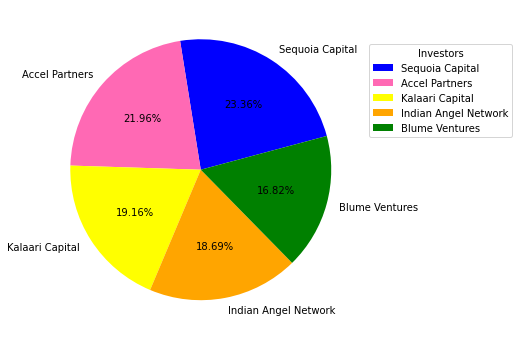

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("/Users/ani/Downloads/startup_funding.csv")  #reading data from startup_funding.csv file
df = startup.copy()  # just making a copy of startup dataframe for reference

df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)  #removing row's having nan's in Investors name and startupnames columns
df.StartupName.replace(['Olacabs','Ola Cabs','Oyo Rooms','Flipkart.com',"Paytm Marketplace"],['Ola','Ola','Oyo','Flipkart','Paytm'],inplace=True) #replacing the correct ones

df.InvestorsName.fillna('empty',inplace=True) #fill empty column
investor_startup=set()   #created an empty set
for i in range(len(df.InvestorsName)):
    for t in df.InvestorsName.iloc[i].split(','):  #used split function to separate out the investors names
            temp=(t.strip(),df.StartupName.iloc[i])
            investor_startup.add(temp)   #adding the names to the set
investor_startup=list(investor_startup)  #converted the set to list
data=pd.DataFrame(investor_startup,columns=['investor','startup'])
data.investor.value_counts()
name=[]   #created a list to store the names
val=[]    #created a list to store the values
for i in data.investor.value_counts().index[:6]: #filtering the result and displaying it
    if i!='':
        print(i,end=" ")
        name.append(i)
        print(data.investor.value_counts().loc[i])
        val.append(data.investor.value_counts().loc[i])
fig = plt.figure(figsize =(8, 6)) #plotting pie chart
colors = ( "blue", "hotpink", "yellow","orange", "green")

plt.pie(val,labels=name,autopct='%.2f%%',startangle=15,colors=colors)  #plotting a pie-chart
plt.legend(title = "Investors", bbox_to_anchor = (1, 0.9))  #giving a title
plt.show()     

4.Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


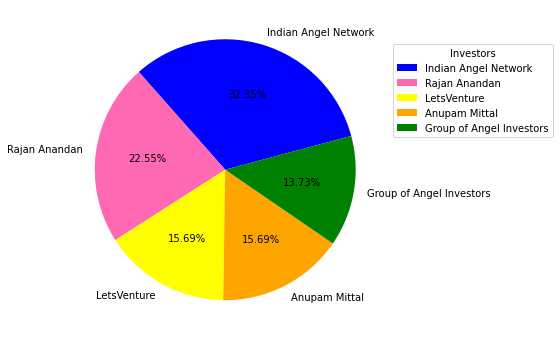

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("/Users/ani/Downloads/startup_funding.csv")  #reading data from startup_funding.csv file
df = startup.copy()  # just making a copy of startup dataframe for reference
df.InvestmentType.replace(['SeedFunding','PrivateEquity','Crowd funding'],['Seed Funding','Private Equity','Crowd Funding'],inplace=True)
df.InvestmentType.fillna('emp',inplace=True)# handling missing values
df.StartupName.replace(['Olacabs','Ola Cabs','Oyo Rooms','Flipkart.com',"Paytm Marketplace"],['Ola','Ola','Oyo','Flipkart','Paytm'],inplace=True)
df.InvestorsName.fillna('empty',inplace=True)#filling empty column
invest_type=['Crowd Funding','Seed Funding'] # desired investment type 
invest_startup=set() #set of tuple->(investor,company) 
for i in range(len(df.InvestorsName)):
    if df.InvestmentType.iloc[i] in invest_type:
         for t in df.InvestorsName.iloc[i].split(','):  #used split function to separate out the investors names
                tup=(t.strip(),df.StartupName.iloc[i])
                invest_startup.add(tup)
invest_startup=list(invest_startup)
data_frame=pd.DataFrame(invest_startup,columns=['investor','startup'])
data_frame.investor.value_counts()[:10] # got the first 10 values
name=[]   #created a list to store the names
val=[]    #created a list to store the values
for i in data_frame.investor.value_counts().index[:8]:  #filtering the result and displaying it
    if i!='' and i!='Undisclosed Investors' and i!='Undisclosed investors':
        print(i,end=" ")
        name.append(i)
        print(data_frame.investor.value_counts().loc[i])
        val.append(data_frame.investor.value_counts().loc[i])
fig = plt.figure(figsize =(8, 6)) #plotting pie chart
colors = ( "blue", "hotpink", "yellow","orange", "green")
plt.pie(val,labels=name,autopct='%.2f%%',startangle=15,colors=colors)   #plotting a pie-chart
plt.legend(title = "Investors", bbox_to_anchor = (1, 0.9))  #giving a title
plt.show()     

5.Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.


Sequoia Capital    47
Accel Partners     43
Kalaari Capital    35
Blume Ventures     27
SAIF Partners      24
Name: investor, dtype: int64


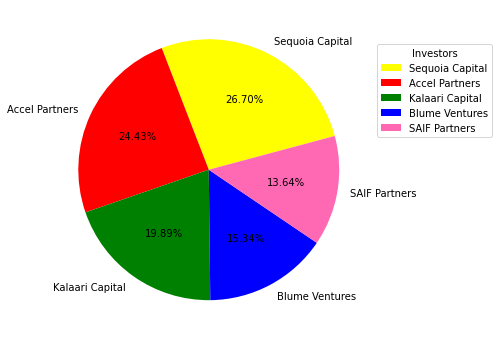

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("/Users/ani/Downloads/startup_funding.csv")  #reading data from startup_funding.csv file
df = startup.copy()  # just making a copy of startup dataframe for reference
df.InvestmentType.replace(['SeedFunding','PrivateEquity','Crowd funding'],['Seed Funding','Private Equity','Crowd Funding'],inplace=True)
df.InvestmentType.fillna('emp',inplace=True)# handling missing values
df.StartupName.replace(['Olacabs','Ola Cabs','Oyo Rooms','Flipkart.com',"Paytm Marketplace"],['Ola','Ola','Oyo','Flipkart','Paytm'],inplace=True)
df.InvestorsName.fillna('empty',inplace=True)#filling empty column
invest_type=['Private Equity'] # desired investment type 
invest_startup=set()# making a set of tuple of investor and companies invested in
for i in range(len(df.InvestorsName)):
    if df.InvestmentType.iloc[i] in invest_type:
         for t in df.InvestorsName.iloc[i].split(','):   #used split function to separate out the investors names
                tup=(t.strip(),df.StartupName.iloc[i]) 
                invest_startup.add(tup)
invest_startup=list(invest_startup)
data_frame=pd.DataFrame(invest_startup,columns=['investor','startup'])# make a dataframe
ans=data_frame.investor.value_counts()[:5]
print(ans)
fig = plt.figure(figsize =(10, 6))  
colors = ( "yellow", "red", "green","blue", "hotpink")
plt.pie(ans.values,labels=ans.index, autopct='%.2f%%', startangle=15, colors=colors) #plotting a pie-chart
plt.legend(title = "Investors", bbox_to_anchor = (1, 0.9)) #giving a title
plt.show() 